**Team (Travail ensemble fifty-fifty)**:

**Ahonon Gobi Parfait** 

**Pellisier Mathias**



# Série 11
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices dans deux semaines.

Pour chaque exercice:

* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension.

Les tentatives infructueuses, les explications, commentaires et analyses des échecs rapportent des points. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Description
Un arbre binaire peut être utilisé pour stocker une liste ordonnée d'éléments de manière à ce que la recherche et les insertions soient efficaces. Un arbre binaire utilisé de cette manière s'appelle un **arbre de tri binaire** (ou BST).

Un arbre de tri binaire est un arbre binaire ayant la propriété suivante : pour chaque nœud de l'arbre, l'élément de ce nœud est supérieur à chaque élément du sous-arbre gauche de ce nœud, et il est inférieur ou égal à tous les éléments du sous-arbre droit de ce nœud. L'exemple ci-dessous montre un arbre de tri binaire contenant des éléments de type `String`, mais il en va de même pour les entiers, ou d'autres types comparables.


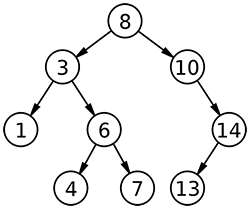

## Evaluation
Le but de l'évaluation est de montrer expérimentalement, au moyen d'une implémentation et de quelques évaluations simples, l'affirmation $H_0$ suivante :
>Si un **arbre de tri binaire** est créé **aléatoirement suivant une loi uniforme**, il y a une forte probabilité que l'arbre soit **approximativement équilibré** (*i.e.*, l'écart type de la distribution de la profondeur des feuilles est faible).

### Exercice 1
Testez la structure de données fournie en implémentant la méthode `to_sorted_list` qui retourne une liste avec les éléments ordonnés contenu dans l'arbre, du plus petit au plus grand.

In [2]:
# Un objet de type TreeNode représente un nœud.
class TreeNode():
    def __init__ (self, item):
        self.item = item
        self.left = None    # Objet TreeNode qui pointe vers le sous-arbre gauche.
        self.right = None   # Objet TreeNode qui pointe vers le sous-arbre droit.

class Tree:
    def __init__(self):
        self.root = None

    # Insère un nouvel élément dans l'arbre de tri binaire
    def insert(self, new_item):
        # Si l'arbre est vide, le nouvel élément devient la racine.
        if self.root == None:
            self.root = TreeNode(new_item)
            return
        # Descend dans l'arbre pour trouver une place pour new_item.
        # Nous commençons par la racine
        runner = self.root
        while(True):
            # Puisque le nouvel élément est inférieur à l'élément runner,
            # il appartient au sous-arbre gauche du coureur.
            # S'il y a un espace libre à runner.left, ajoutez-y un nœud.
            # Sinon, avancez runner d'un niveau vers la gauche.
            if new_item < runner.item:
                if runner.left == None:
                    runner.left = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre
                    return
                else:
                    runner = runner.left
            # Puisque le nouvel élément est supérieur ou égal à l'élément runner,
            # il appartient au sous-arbre droit de runner.
            # S'il y a un espace libre à runner.right, ajoutez-y un nouveau nœud.
            # Sinon, avancez runner d'un niveau vers la droite.
            else:
                if runner.right == None:
                    runner.right = TreeNode(new_item)
                    # Un nouvel élément a été ajouté à l'arbre.
                    return
                else:
                    runner = runner.right

    # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
    # Retourne False si ce n'est pas le cas.
    def contains(self, item):
        # Retourne True si item est un des items de l'arbre de tri binaire vers lequel le nœud pointe.
        # Retourne False si ce n'est pas le cas
        def contains_internal(node, item):
            # L'arbre est vide, il ne contient donc certainement pas d'élément.
            if node == None:
                return False
            # Oui, l'élément a été trouvé dans le nœud racine.
            elif item == node.item:
                return True
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de gauche
            # On renvoie le résultat de la recherche dans le sous-arbre de gauche
            elif item < node.item:
                return contains_internal(node.left, item)
            # Si l'élément apparaît, il doit se trouver dans le sous-arbre de droite
            # On renvoie le résultat de la recherche dans le sous-arbre de droite
            else:
                return contains_internal(node.right, item)

        return contains_internal(self.root, item)

    # Crée une liste ordonnée croissante des élément du BST
    def to_sorted_list(self):
        result = []
        def inorder(node):
            if node is not None:
                inorder(node.left)
                result.append(node.item)
                inorder(node.right)
        inorder(self.root)
        return result


In [3]:
t = Tree()
# les lettres de l'alphabet latin sont comparables en Python
t.insert("d")
t.insert("b")
t.insert("f")
t.insert("c")
t.insert("a")
t.insert("e")
t.insert("g")
sorted_list = t.to_sorted_list()
assert ["a", "b", "c", "d", "e", "f", "g"] == sorted_list
assert t.contains("a")
assert not t.contains("z")

### Exercice 2
Créez un arbre de tri binaire aléatoire suivant $U[\![0;1000]\!]$ avec $2^{15}$ (32'768) nœuds. Vous pouvez remplir l'arbre en utilisant la méthode `insert` (voir le code source). Affichez les nombres du plus petits aux plus grands.

In [8]:
import random

# Création de l’arbre
t = Tree()

# Insertion de 32'768 éléments choisis uniformément entre 0 et 1000
for _ in range(32768):
    value = random.randint(0, 1000)
    t.insert(value)

# Récupération des éléments triés
sorted_list = t.to_sorted_list()

# Affichage des éléments
print(sorted_list)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 

### Exercice 3
Calculez et affichez la profondeur moyenne de toutes les feuilles de l'arbre créé dans l'exercice 2.

Pour vous aider vous pourriez créer un petit fichier texte appelé `depths.txt`, avec la profondeur de chaque feuille, une valeur par ligne. Mais vous pouvez utiliser une variable pour stocker l'information. Une liste ferait l'affaire.

Pour ce faire, vous aurez besoin de deux fonctions récursives : une pour compter les feuilles et une pour trouver la somme des profondeurs de toutes les feuilles. Cette dernière routine doivent accepter un paramètre de type entier (depth), qui indique à quelle profondeur de l'arbre vous êtes allés. Lorsque vous appelez cette routine de manière récursive, la valeur de la profondeur augmente de 1. Vous êtes libre de définir des paramètres additionels, mais la récusivité est exigée pour cet exercice.

In [4]:
def count_leaves(root):
    # Si l'arbre est vide, il n'y a pas de feuilles
    if root is None:
        return 0
    # Un nœud sans fils gauche et droit est une feuille
    if root.left is None and root.right is None:
        return 1
    # Sinon, la quantité de feuilles est la somme des feuilles dans le sous-arbre gauche et droit
    return count_leaves(root.left) + count_leaves(root.right)

def sum_depth(root, depth, file=None):
    # Si l'arbre est vide, pas de profondeur à ajouter
    if root is None:
        return 0
    # Si c'est une feuille, retourner la profondeur actuelle
    if root.left is None and root.right is None:
 
        return depth
    # Sinon, la somme des profondeurs est celle de son sous-arbre gauche plus celle de son sous-arbre droit
    return sum_depth(root.left, depth + 1, file) + sum_depth(root.right, depth + 1, file)


In [14]:
print("Number of leaves:")
counter = count_leaves(t.root)
print(counter)
print("Sum of depth of all leaves")
# Utiliser f.write(...) dans la fonction sum_depth() pour écrire dans depths.txt
with open("depths.txt", 'a+') as file:
    s = sum_depth(t.root, 1, file)
print(s)
print("Average depth:")
print(s/counter)

Number of leaves:
1001
Sum of depth of all leaves
45893
Average depth:
45.84715284715285


#### Exercice 3.1 (<font color='#db60cf'>Bonus</font>)
Reportez dans un graphique la distribution des profondeurs des feuilles (il y a `counter` feuilles à afficher sur un histogramme). Vous pourrez vous aider en utilisant [Matplotlib](https://matplotlib.org/), un outil de visualisation pour Python. Matplotlib est déjà inclu dans la plupart des plateforms en ligne de Jupyter Notebook (notamment Colab).

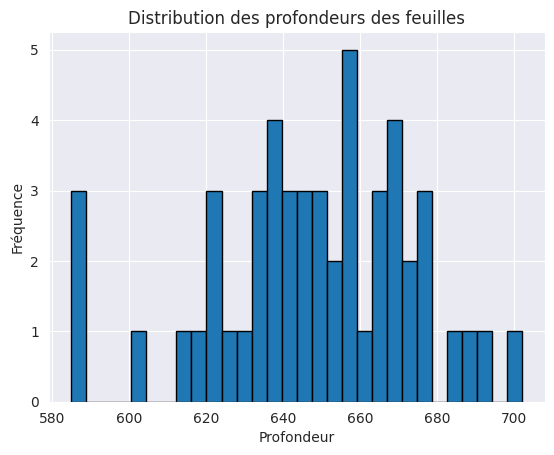

In [6]:
import matplotlib.pyplot as plt

def collect_leaf_depths(root, depth, depths_list):
    if root is None:
        return
    if root.left is None and root.right is None:
        # C'est une feuille, on enregistre sa profondeur
        depths_list.append(depth)
    else:
        # Parcours récursif pour trouver toutes les feuilles
        collect_leaf_depths(root.left, depth+1, depths_list)
        collect_leaf_depths(root.right, depth+1, depths_list)

# Après avoir construit votre arbre `t`
leaf_depths = []
collect_leaf_depths(t.root, 0, leaf_depths)

# Affichage de l'histogramme des profondeurs
plt.hist(leaf_depths, bins=30, edgecolor='black')
plt.title("Distribution des profondeurs des feuilles")
plt.xlabel("Profondeur")
plt.ylabel("Fréquence")
plt.show()


Ce résultat semble-t-il dans le sens de l'hypothèse $H_0$ formulée plus tôt ? Quel serait l'intérêt qu'une telle hypothèse fût vraie ? Quelle allure aurait l'histogramme si le BST était parfaitement équilibré ?

**Interprétation des résultats par rapport à l’hypothèse $H_0$ :**  
L’hypothèse $H_0$ affirme que si l’on construit un arbre de recherche binaire (BST) de manière aléatoire et uniforme, il y a une forte probabilité pour que l’arbre soit approximativement équilibré. Cela signifie que les profondeurs des feuilles seront relativement concentrées autour d’une valeur moyenne, avec peu de dispersion (un écart-type faible).

Si les résultats expérimentaux (l’histogramme des profondeurs des feuilles) montrent que la plupart des feuilles se trouvent à des profondeurs relativement proches les unes des autres, sans une longue « traîne » vers des profondeurs extrêmes, cela va dans le sens de l’hypothèse $H_0$. Cela suggère qu’un BST construit aléatoirement n’est pas, en pratique, trop « déséquilibré » et ressemble plutôt, statistiquement, à un arbre raisonnablement équilibré.

**Intérêt de cette hypothèse si elle s’avérait vraie :**  
Si cette hypothèse est correcte, cela implique que dans la pratique, la performance des opérations (insertion, recherche, suppression) sur un BST créé aléatoirement serait, en moyenne, proche de la complexité logarithmique `O(log n)`. Cela rassure sur le fait qu’un BST construit de manière hasardeuse ne dégénère pas fréquemment en une liste chaînée (où les opérations seraient en `O(n)`), mais qu’il conserve souvent une structure « raisonnablement » équilibrée.

**Allure de l’histogramme pour un BST parfaitement équilibré :**  
Si l’arbre était parfaitement équilibré, toutes les feuilles seraient concentrées à un niveau de profondeur très proche, quasiment le même pour chaque feuille (par exemple, autour de `log2(n)` si n est le nombre de nœuds). L’histogramme des profondeurs des feuilles présenterait alors un pic très prononcé à une seule valeur (ou un très faible étalement autour d’une valeur centrale). En d’autres termes, la distribution serait extrêmement resserrée, presque un delta de Dirac, avec la plupart des feuilles à la même profondeur.

Faites varier la limite supérieure en paramètre de votre générateur uniforme d'entiers parmi `np.arange(50, 500, 10)` en prenant soin de conserver à chaque fois l'écart type et la moyenne de la distribution. Que remarquez-vous ? Comment l'expliqueriez-vous ?

Defaulting to user installation because normal site-packages is not writeable


100%|███████████████████████████████████████████| 45/45 [00:22<00:00,  1.99it/s]


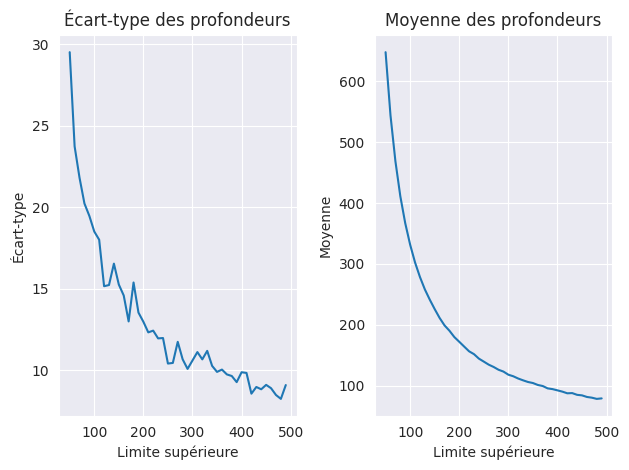

In [7]:
import random
import matplotlib.pyplot as plt

# Installation de la librairie tqdm pour afficher une barre de progression
!pip install tqdm
import numpy as np
import statistics
import tqdm

means, stddevs = [], []

for largest_possible_number in tqdm.tqdm(np.arange(50, 500, 10)):
    t = Tree()
    for _ in range(32768):
        val = random.randint(0, largest_possible_number)
        t.insert(val)
    
    depths_list = []
    collect_leaf_depths(t.root, 0, depths_list)
    
    stddevs.append(statistics.stdev(depths_list))
    means.append(statistics.mean(depths_list))

# Affichage des résultats, Nous avions ajouté des titres ici pour plus de comprehension/ distinction
plt.subplot(1, 2, 1)
plt.plot(np.arange(50, 500, 10), stddevs)
plt.title("Écart-type des profondeurs")
plt.xlabel("Limite supérieure")
plt.ylabel("Écart-type")

plt.subplot(1, 2, 2)
plt.plot(np.arange(50, 500, 10), means)
plt.title("Moyenne des profondeurs")
plt.xlabel("Limite supérieure")
plt.ylabel("Moyenne")

plt.tight_layout()
plt.show()


Ce code génère plusieurs arbres de recherche binaires (BST) de façon aléatoire, en faisant varier la limite supérieure de l’intervalle des valeurs insérées. Pour chaque arbre, on insère `2^15` valeurs entières tirées uniformément entre 0 et cette limite. On calcule ensuite la profondeur de chaque feuille de l’arbre, puis on obtient leur écart-type et leur moyenne. Enfin, on trace un graphique pour visualiser l’évolution de la répartition des profondeurs (via l’écart-type et la moyenne) en fonction de la limite supérieure utilisée pour la génération des valeurs. 

on remarque que l'écart-type des profondeurs des feuilles diminue progressivement à mesure que la limite supérieure des valeurs insérées augmente. En revanche, la moyenne des profondeurs aussi dimunie progressivement au fur et à mesure que la limite supérieure augmente.